In [1]:
class MyBGDRegression:
    #interceptul + coeficientii
    # intercept - bias (b din y = mx+b, m - panta)
    def __init__(self):
        self.intercept_ = 0.0
        self.coef_ = []

    # batch gradient descent
    def fit(self, x, y, learningRate=0.001, noEpochs=1000, batches=20):
        self.coef_ = [0.0 for _ in range(len(x[0]) + 1)]
        
        #parcurgere epoci
        for epoch in range(noEpochs):
            #parcurgere date in bucati de dim
            for i in range(0, len(x), batches):
                #calcul valori estimate
                ycomputed = [self.eval(xi) for xi in x[i:i + batches]]
                #calcul erori
                crtErrors = [yc - yi for yc, yi in
                             zip(ycomputed, y[i:i + batches])]
                #per feature
                for j in range(0, len(x[0])):
                    #actualizarea coef folosind gradient descendent
                    self.coef_[j] = self.coef_[j] - learningRate * sum(
                        [crtError * xi[j] for crtError, xi in zip(crtErrors, x[i:i + batches])])
                #bias
                self.coef_[len(x[0])] = self.coef_[len(x[0])] - learningRate * sum(crtErrors)

        self.intercept_ = self.coef_[-1]
        self.coef_ = self.coef_[:-1]

    #per feature, calcul valoare estimata (in functie de instanta)
    def eval(self, xi):
        yi = self.coef_[-1]
        for j in range(len(xi)):
            yi += self.coef_[j] * xi[j]
        return yi

    #estimare
    def predict(self, x):
        return [self.eval(xi) for xi in x]


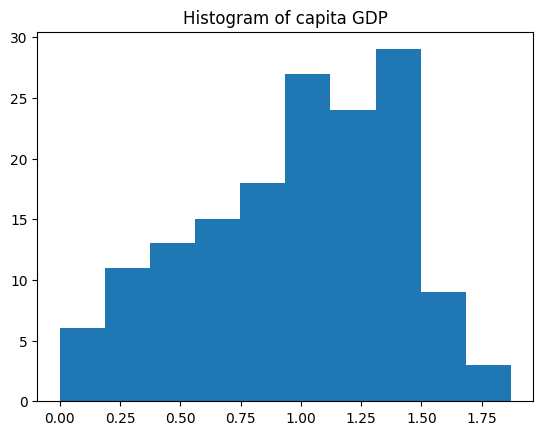

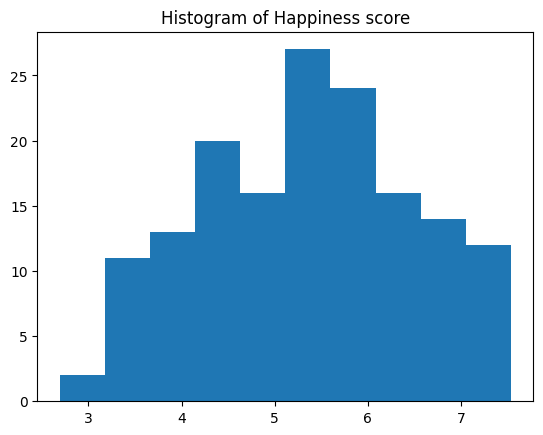

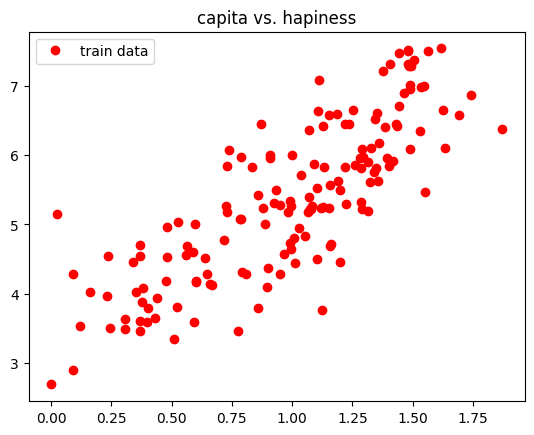

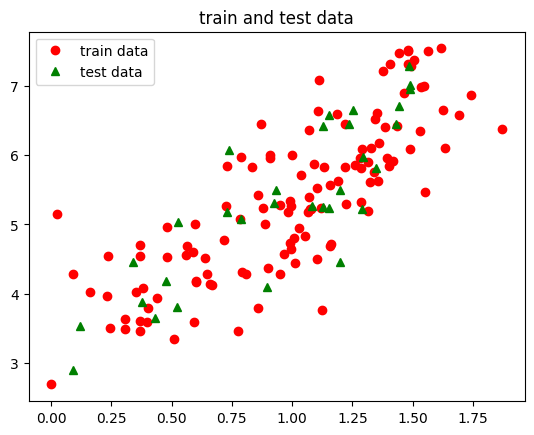

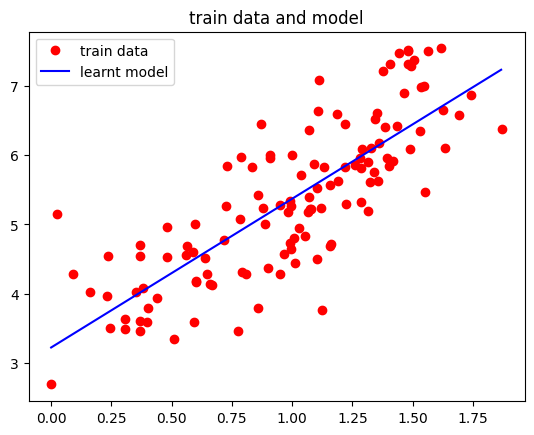

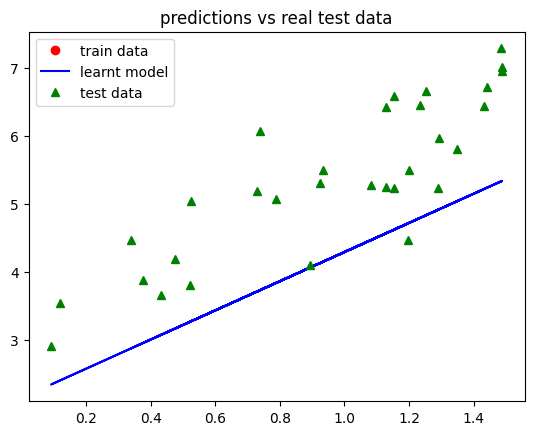

prediction error (manual):  1.6938392439438434


In [3]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
import csv
import matplotlib.pyplot as plt


def loadData(fileName, inputVariabName, outputVariabName):
    data = []
    dataNames = []
    with open(fileName) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                dataNames = row
            else:
                data.append(row)
            line_count += 1

    selectedVariable = dataNames.index(inputVariabName)
    inputs = [float(data[i][selectedVariable]) for i in range(len(data))]
    selectedOutput = dataNames.index(outputVariabName)
    outputs = [float(data[i][selectedOutput]) for i in range(len(data))]

    return inputs, outputs


def plotDataHistogram(x, variableName):
    n, bins, patches = plt.hist(x, 10)
    plt.title('Histogram of ' + variableName)
    plt.show()


def plotData(x1, y1, x2=None, y2=None, x3=None, y3=None, title=None):
    plt.plot(x1, y1, 'ro', label='train data')
    if (x2):
        plt.plot(x2, y2, 'b-', label='learnt model')
    if (x3):
        plt.plot(x3, y3, 'g^', label='test data')
    plt.title(title)
    plt.legend()
    plt.show()


inputs, outputs = loadData('data/fericire-2017.csv', 'Economy..GDP.per.Capita.', 'Happiness.Score')

plotDataHistogram(inputs, 'capita GDP')
plotDataHistogram(outputs, 'Happiness score')

# check the liniarity (to check that a linear relationship exists between the dependent variable (y = happiness) and the independent variable (x = capita).)
plotData(inputs, outputs, [], [], [], [], 'capita vs. hapiness')

# split data into training data (80%) and testing data (20%)
trainInputs, validationInputs, trainOutputs, validationOutputs = train_test_split(inputs, outputs, test_size=0.2,
                                                                                  random_state=42)
plotData(trainInputs, trainOutputs, [], [], validationInputs, validationOutputs, "train and test data")

# training step
xx = [[el] for el in trainInputs]
regressor = MyBGDRegression()
regressor.fit(xx, trainOutputs)
w0, w1 = regressor.intercept_, regressor.coef_[0]

# plot the model
noOfPoints = 1000
xref = []
val = min(trainInputs)
step = (max(trainInputs) - min(trainInputs)) / noOfPoints
for i in range(1, noOfPoints):
    xref.append(val)
    val += step
yref = [w0 + w1 * el for el in xref]
plotData(trainInputs, trainOutputs, xref, yref, [], [], title="train data and model")

# makes predictions for test data
computedValidationOutputs = regressor.predict([[x] for x in validationInputs])
plotData([], [], validationInputs, computedValidationOutputs, validationInputs, validationOutputs,
         "predictions vs real test data")

# compute the differences between the predictions and real outputs
error = 0.0
for t1, t2 in zip(computedValidationOutputs, validationOutputs):
    error += (t1 - t2) ** 2
error = error / len(validationOutputs)
print("prediction error (manual): ", error)

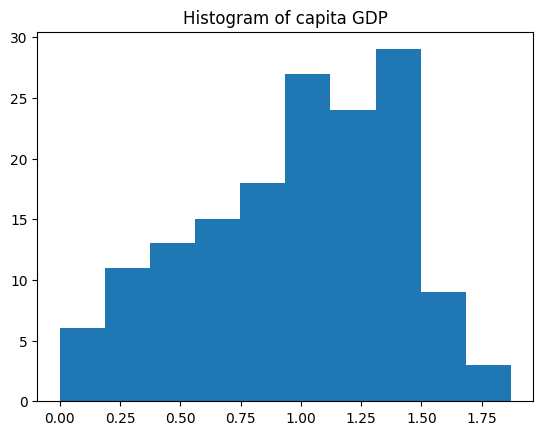

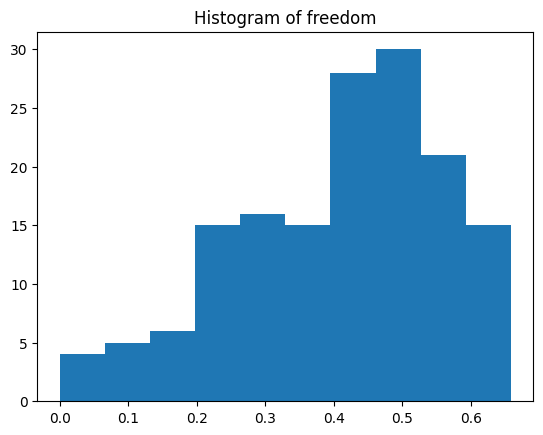

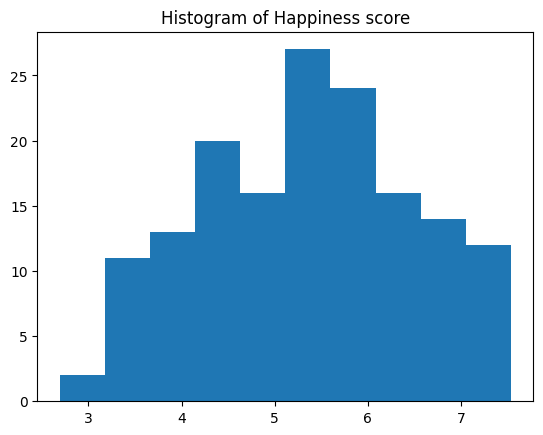

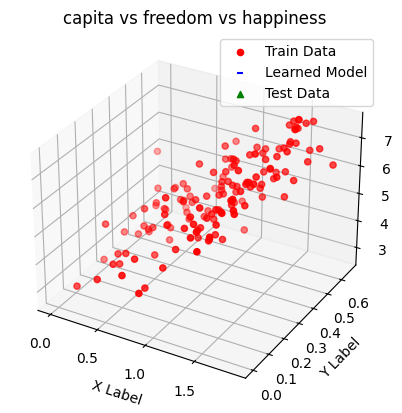

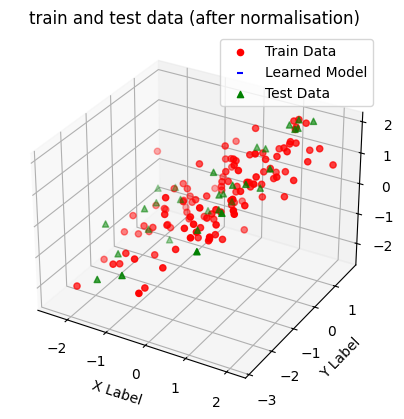

the learnt model: f(x) =  -0.0011659051562902811  +  0.6979590980445686  * x1 +  0.3039745892925814  * x2


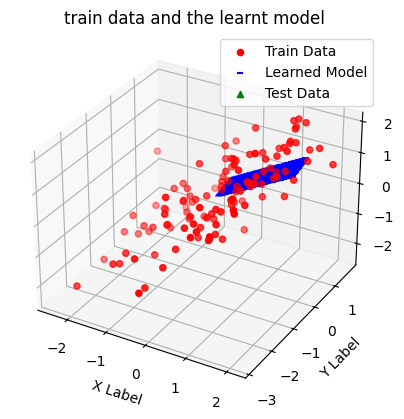

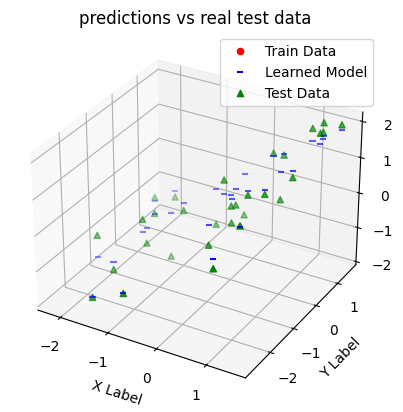

prediction error (tool):    0.2332252142752404


In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np


def plot3Ddata(x1Train, x2Train, yTrain, x1Model=None, x2Model=None, yModel=None, x1Test=None, x2Test=None, yTest=None, title=None):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    if x1Train is not None:
        ax.scatter(x1Train, x2Train, yTrain, c='red', marker='o', label='Train Data')
    if x1Model is not None:
        ax.scatter(x1Model, x2Model, yModel, c='blue', marker='_', label='Learned Model')
    if x1Test is not None:
        ax.scatter(x1Test, x2Test, yTest, c='green', marker='^', label='Test Data')

    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    plt.title(title)
    ax.legend()
    plt.show()


def plotDataHistogram(x, variableName):
    n, bins, patches = plt.hist(x, 10)
    plt.title('Histogram of ' + variableName)
    plt.show()


def loadDataMoreInputs(fileName, inputVariabNames, outputVariabName):
    data = []
    dataNames = []
    with open(fileName) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                dataNames = row
            else:
                data.append(row)
            line_count += 1
    selectedVariable1 = dataNames.index(inputVariabNames[0])
    selectedVariable2 = dataNames.index(inputVariabNames[1])
    inputs = [[float(data[i][selectedVariable1]), float(data[i][selectedVariable2])] for i in range(len(data))]
    selectedOutput = dataNames.index(outputVariabName)
    outputs = [float(data[i][selectedOutput]) for i in range(len(data))]

    return inputs, outputs


def normalisation(trainData, testData):
    #Standard Scaling
    scaler = StandardScaler()
    if not isinstance(trainData[0], list):
        #encode each sample into a list
        trainData = [[d] for d in trainData]
        testData = [[d] for d in testData]
        
        scaler.fit(trainData)  #  fit only on training data
        normalisedTrainData = scaler.transform(trainData) # apply same transformation to train data
        normalisedTestData = scaler.transform(testData)  # apply same transformation to test data
        
        #decode from list to raw values
        normalisedTrainData = [el[0] for el in normalisedTrainData]
        normalisedTestData = [el[0] for el in normalisedTestData]
    else:
        scaler.fit(trainData)  #  fit only on training data
        normalisedTrainData = scaler.transform(trainData) # apply same transformation to train data
        normalisedTestData = scaler.transform(testData)  # apply same transformation to test data
    return normalisedTrainData, normalisedTestData

inputs, outputs = loadDataMoreInputs('data/fericire-2017.csv', ['Economy..GDP.per.Capita.', 'Freedom'], 'Happiness.Score')

feature1 = [ex[0] for ex in inputs]
feature2 = [ex[1] for ex in inputs]

# plot the data histograms
plotDataHistogram(feature1, 'capita GDP')
plotDataHistogram(feature2, 'freedom')
plotDataHistogram(outputs, 'Happiness score')

# check the liniarity (to check that a linear relationship exists between the dependent variable (y = happiness) and the independent variables (x1 = capita, x2 = freedom).)
plot3Ddata(feature1, feature2, outputs, [], [], [], [], [], [], 'capita vs freedom vs happiness')

np.random.seed(5)
indexes = [i for i in range(len(inputs))]
trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace = False) #fara elemente duplicate
testSample = [i for i in indexes  if not i in trainSample]

trainInputs = [inputs[i] for i in trainSample]
trainOutputs = [outputs[i] for i in trainSample]
testInputs = [inputs[i] for i in testSample]
testOutputs = [outputs[i] for i in testSample]

trainInputs, testInputs = normalisation(trainInputs, testInputs)
trainOutputs, testOutputs = normalisation(trainOutputs, testOutputs)

feature1train = [ex[0] for ex in trainInputs]
feature2train = [ex[1] for ex in trainInputs]

feature1test = [ex[0] for ex in testInputs]
feature2test = [ex[1] for ex in testInputs]

plot3Ddata(feature1train, feature2train, trainOutputs, [], [], [], feature1test, feature2test, testOutputs, "train and test data (after normalisation)")

regressor = MyBGDRegression()
regressor.fit(trainInputs, trainOutputs)
w0, w1, w2 = regressor.intercept_, regressor.coef_[0], regressor.coef_[1]
print('the learnt model: f(x) = ', w0, ' + ', w1, ' * x1 + ', w2, ' * x2')

#numerical representation of the regressor model
noOfPoints = 50
xref1 = []
val = min(feature1)
step1 = (max(feature1) - min(feature1)) / noOfPoints
for _ in range(1, noOfPoints):
    for _ in range(1, noOfPoints):
        xref1.append(val)
    val += step1

xref2 = []
val = min(feature2)
step2 = (max(feature2) - min(feature2)) / noOfPoints
for _ in range(1, noOfPoints):
    aux = val
    for _ in range(1, noOfPoints):
        xref2.append(aux)
        aux += step2
yref = [w0 + w1 * el1 + w2 * el2 for el1, el2 in zip(xref1, xref2)]
plot3Ddata(feature1train, feature2train, trainOutputs, xref1, xref2, yref, [], [], [], 'train data and the learnt model')

computedTestOutputs = regressor.predict(testInputs)
plot3Ddata([], [], [], feature1test, feature2test, computedTestOutputs, feature1test, feature2test, testOutputs, 'predictions vs real test data')

error = mean_squared_error(testOutputs, computedTestOutputs)
print('prediction error (tool):   ', error)

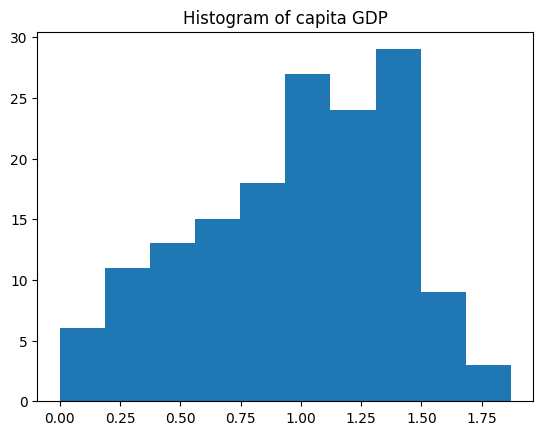

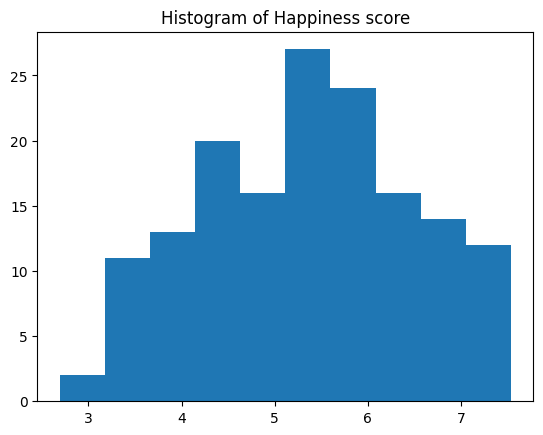

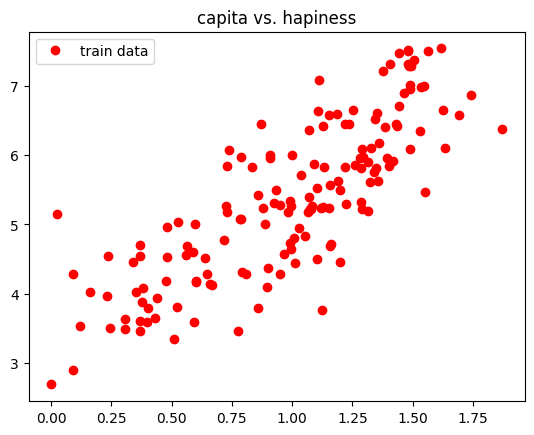

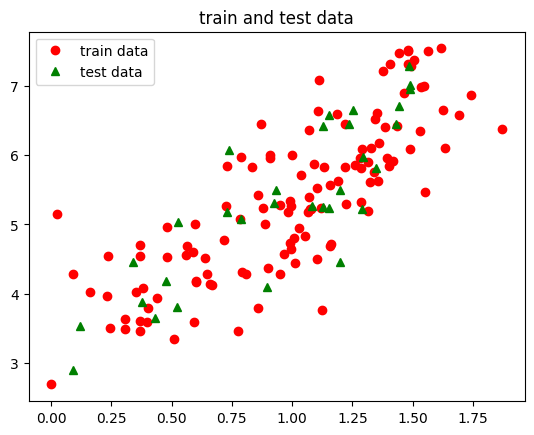

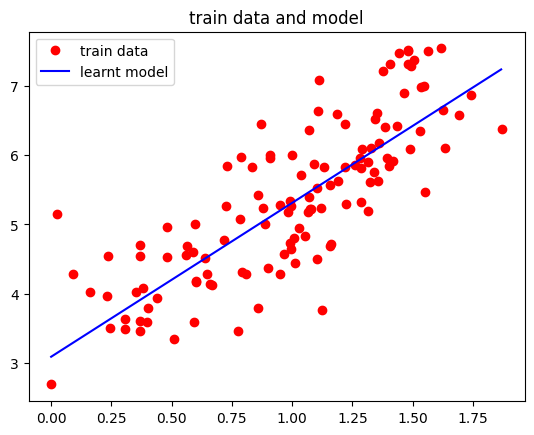

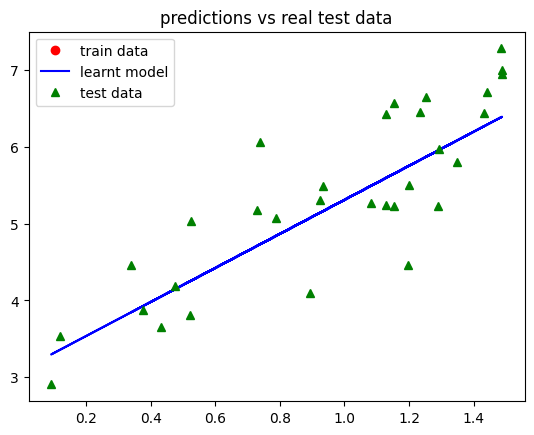

prediction error (manual):  0.37443567180570514
Average MSE across cross-validation folds: 0.4405274393058837


In [7]:
from sklearn.linear_model import SGDRegressor
# WITH TOOL

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
import csv
import matplotlib.pyplot as plt


def loadData(fileName, inputVariabName, outputVariabName):
    data = []
    dataNames = []
    with open(fileName) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                dataNames = row
            else:
                data.append(row)
            line_count += 1

    selectedVariable = dataNames.index(inputVariabName)
    inputs = [float(data[i][selectedVariable]) for i in range(len(data))]
    selectedOutput = dataNames.index(outputVariabName)
    outputs = [float(data[i][selectedOutput]) for i in range(len(data))]

    return inputs, outputs


def plotDataHistogram(x, variableName):
    n, bins, patches = plt.hist(x, 10)
    plt.title('Histogram of ' + variableName)
    plt.show()


def plotData(x1, y1, x2=None, y2=None, x3=None, y3=None, title=None):
    plt.plot(x1, y1, 'ro', label='train data')
    if (x2):
        plt.plot(x2, y2, 'b-', label='learnt model')
    if (x3):
        plt.plot(x3, y3, 'g^', label='test data')
    plt.title(title)
    plt.legend()
    plt.show()


inputs, outputs = loadData('data/fericire-2017.csv', 'Economy..GDP.per.Capita.', 'Happiness.Score')

plotDataHistogram(inputs, 'capita GDP')
plotDataHistogram(outputs, 'Happiness score')

# check the liniarity (to check that a linear relationship exists between the dependent variable (y = happiness) and the independent variable (x = capita).)
plotData(inputs, outputs, [], [], [], [], 'capita vs. hapiness')

# split data into training data (80%) and testing data (20%)
trainInputs, validationInputs, trainOutputs, validationOutputs = train_test_split(inputs, outputs, test_size=0.2,
                                                                                  random_state=42)
plotData(trainInputs, trainOutputs, [], [], validationInputs, validationOutputs, "train and test data")

# training step
xx = [[el] for el in trainInputs] #incapsulez elementele
#ajust learning_rate, eta - initial learning_rate, max_iter, criteriu oprire, 
regressor = SGDRegressor(learning_rate='constant', eta0=0.01, max_iter=1000, tol=1e-3, penalty=None)
regressor.fit(xx, trainOutputs)
#coeficientii
w0, w1 = regressor.intercept_, regressor.coef_[0]

# plot the model
noOfPoints = 1000
xref = []
val = min(trainInputs)
step = (max(trainInputs) - min(trainInputs)) / noOfPoints
for i in range(1, noOfPoints):
    xref.append(val)
    val += step
yref = [w0 + w1 * el for el in xref]
plotData(trainInputs, trainOutputs, xref, yref, [], [], title="train data and model")

# makes predictions for test data
computedValidationOutputs = regressor.predict([[x] for x in validationInputs])
plotData([], [], validationInputs, computedValidationOutputs, validationInputs, validationOutputs,
         "predictions vs real test data")

# compute the differences between the predictions and real outputs
error = 0.0
for t1, t2 in zip(computedValidationOutputs, validationOutputs):
    error += (t1 - t2) ** 2
error = error / len(validationOutputs)
print("prediction error (manual): ", error)

# evaluarea performante MLuri
def cross_validate(model, inputs, outputs, num_folds=5):
    #vector -> reconvertire pt 1 feature (necesar pt divizare si cross_val_score)
    inputs = np.array(inputs)
    inputs = inputs.reshape(-1, 1)
    
    #KFold pentru a diviza datele
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
    
    # evaluare model per fold si scor MSE
    mse_scores = cross_val_score(model, inputs, outputs, cv=kf, scoring='neg_mean_squared_error')
    return -mse_scores

mse_scores = cross_validate(regressor, inputs, outputs)

avg_mse = mse_scores.mean()
print("Average MSE:", avg_mse)

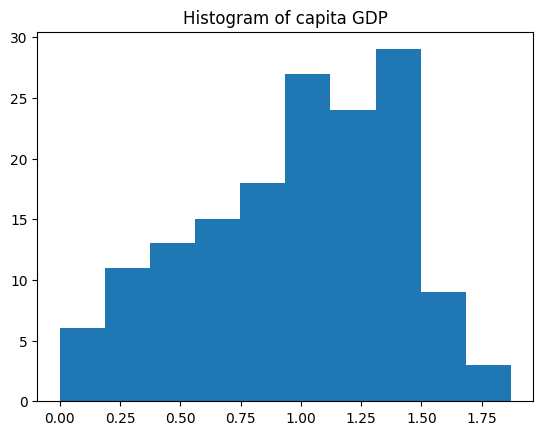

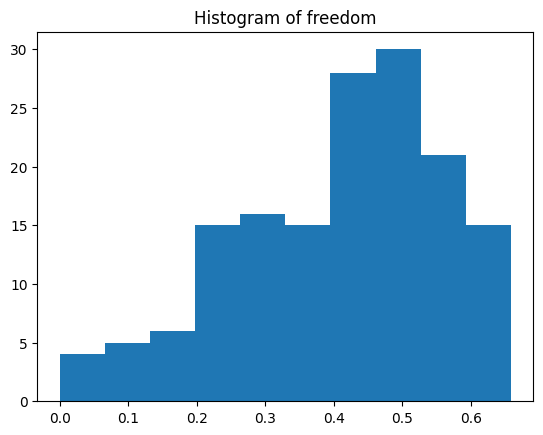

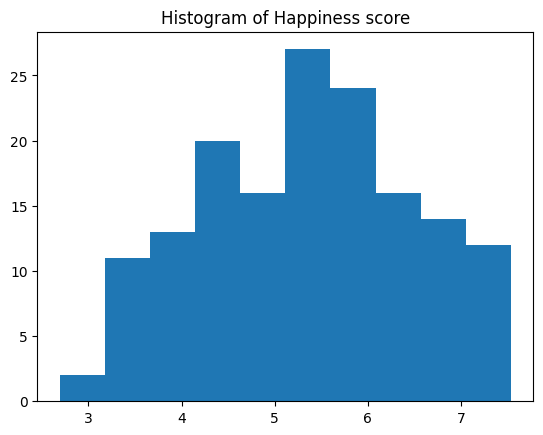

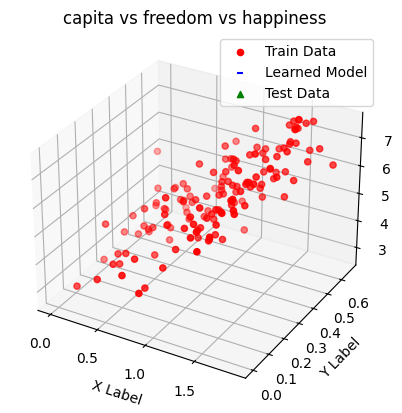

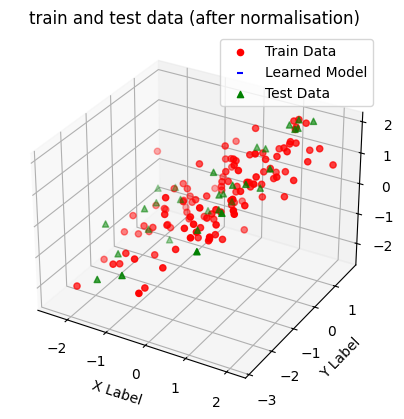

the learnt model: f(x) =  [0.01782198]  +  0.705791605431647  * x1 +  0.31686583023739984  * x2


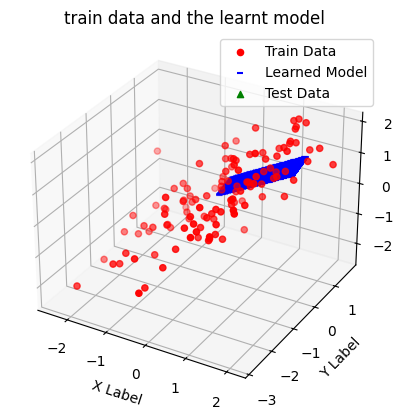

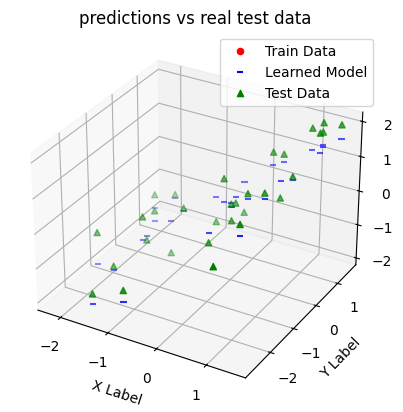

prediction error (tool):    0.2231628220017986
Average MSE across cross-validation folds: 0.3438417716327009


In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np

#WITH TOOL

def plot3Ddata(x1Train, x2Train, yTrain, x1Model=None, x2Model=None, yModel=None, x1Test=None, x2Test=None, yTest=None, title=None):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    if x1Train is not None:
        ax.scatter(x1Train, x2Train, yTrain, c='red', marker='o', label='Train Data')
    if x1Model is not None:
        ax.scatter(x1Model, x2Model, yModel, c='blue', marker='_', label='Learned Model')
    if x1Test is not None:
        ax.scatter(x1Test, x2Test, yTest, c='green', marker='^', label='Test Data')

    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    plt.title(title)
    ax.legend()
    plt.show()


def plotDataHistogram(x, variableName):
    n, bins, patches = plt.hist(x, 10)
    plt.title('Histogram of ' + variableName)
    plt.show()


def loadDataMoreInputs(fileName, inputVariabNames, outputVariabName):
    data = []
    dataNames = []
    with open(fileName) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                dataNames = row
            else:
                data.append(row)
            line_count += 1
    selectedVariable1 = dataNames.index(inputVariabNames[0])
    selectedVariable2 = dataNames.index(inputVariabNames[1])
    inputs = [[float(data[i][selectedVariable1]), float(data[i][selectedVariable2])] for i in range(len(data))]
    selectedOutput = dataNames.index(outputVariabName)
    outputs = [float(data[i][selectedOutput]) for i in range(len(data))]

    return inputs, outputs


def normalisation(trainData, testData):
    scaler = StandardScaler()
    if not isinstance(trainData[0], list):
        #encode each sample into a list
        trainData = [[d] for d in trainData]
        testData = [[d] for d in testData]
        
        scaler.fit(trainData)  #  fit only on training data
        normalisedTrainData = scaler.transform(trainData) # apply same transformation to train data
        normalisedTestData = scaler.transform(testData)  # apply same transformation to test data
        
        #decode from list to raw values
        normalisedTrainData = [el[0] for el in normalisedTrainData]
        normalisedTestData = [el[0] for el in normalisedTestData]
    else:
        scaler.fit(trainData)  #  fit only on training data
        normalisedTrainData = scaler.transform(trainData) # apply same transformation to train data
        normalisedTestData = scaler.transform(testData)  # apply same transformation to test data
    return normalisedTrainData, normalisedTestData

inputs, outputs = loadDataMoreInputs('data/fericire-2017.csv', ['Economy..GDP.per.Capita.', 'Freedom'], 'Happiness.Score')

feature1 = [ex[0] for ex in inputs]
feature2 = [ex[1] for ex in inputs]

# plot the data histograms
plotDataHistogram(feature1, 'capita GDP')
plotDataHistogram(feature2, 'freedom')
plotDataHistogram(outputs, 'Happiness score')

# check the liniarity (to check that a linear relationship exists between the dependent variable (y = happiness) and the independent variables (x1 = capita, x2 = freedom).)
plot3Ddata(feature1, feature2, outputs, [], [], [], [], [], [], 'capita vs freedom vs happiness')

np.random.seed(5)
indexes = [i for i in range(len(inputs))]
trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace = False)
testSample = [i for i in indexes  if not i in trainSample]

trainInputs = [inputs[i] for i in trainSample]
trainOutputs = [outputs[i] for i in trainSample]
testInputs = [inputs[i] for i in testSample]
testOutputs = [outputs[i] for i in testSample]

trainInputs, testInputs = normalisation(trainInputs, testInputs)
trainOutputs, testOutputs = normalisation(trainOutputs, testOutputs)

feature1train = [ex[0] for ex in trainInputs]
feature2train = [ex[1] for ex in trainInputs]

feature1test = [ex[0] for ex in testInputs]
feature2test = [ex[1] for ex in testInputs]

plot3Ddata(feature1train, feature2train, trainOutputs, [], [], [], feature1test, feature2test, testOutputs, "train and test data (after normalisation)")

regressor = SGDRegressor(learning_rate='constant', eta0=0.01, max_iter=1000, tol=1e-3, penalty=None)
regressor.fit(trainInputs, trainOutputs)
w0, w1, w2 = regressor.intercept_, regressor.coef_[0], regressor.coef_[1]
print('the learnt model: f(x) = ', w0, ' + ', w1, ' * x1 + ', w2, ' * x2')

#numerical representation of the regressor model
noOfPoints = 50
xref1 = []
val = min(feature1)
step1 = (max(feature1) - min(feature1)) / noOfPoints
for _ in range(1, noOfPoints):
    for _ in range(1, noOfPoints):
        xref1.append(val)
    val += step1

xref2 = []
val = min(feature2)
step2 = (max(feature2) - min(feature2)) / noOfPoints
for _ in range(1, noOfPoints):
    aux = val
    for _ in range(1, noOfPoints):
        xref2.append(aux)
        aux += step2
yref = [w0 + w1 * el1 + w2 * el2 for el1, el2 in zip(xref1, xref2)]
plot3Ddata(feature1train, feature2train, trainOutputs, xref1, xref2, yref, [], [], [], 'train data and the learnt model')

computedTestOutputs = regressor.predict(testInputs)
plot3Ddata([], [], [], feature1test, feature2test, computedTestOutputs, feature1test, feature2test, testOutputs, 'predictions vs real test data')

error = mean_squared_error(testOutputs, computedTestOutputs)
print('prediction error (tool):   ', error)

def cross_validate(model, inputs, outputs, num_folds=5):
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
    mse_scores = cross_val_score(model, inputs, outputs, cv=kf, scoring='neg_mean_squared_error')
    return -mse_scores

mse_scores = cross_validate(regressor, inputs, outputs)
avg_mse = mse_scores.mean()
print("Average MSE across cross-validation folds:", avg_mse)